
### 2.2 Pytorch Project
### 2.2.1 Load data

In [1]:
import torchvision # to download 'CIFAR10' datasest
import torchvision.transforms as transforms  # to manipulate input data

In [2]:
train_data = torchvision.datasets.CIFAR10(root='./datasets',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets


In [3]:
# data check
image, label = train_data[0]
print(len(train_data), image.size(), label)

50000 torch.Size([3, 32, 32]) 6


In [4]:
import matplotlib
import matplotlib.pyplot as plt

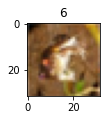

In [5]:
plt.subplot(141)
plt.imshow(image.permute(2,1,0))
plt.title(label)
plt.show()

### 2.2.2. Define Dataloader
define dataloader (dataloader loads data from queue while iters loop)

In [6]:
import torch

In [7]:
data_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=64,
                                          shuffle=True)

In [8]:
# check how data loader works
print(len(data_loader))
for idx, (images, labels) in enumerate(data_loader):
  if idx ==3:
    break
  print(image.size(), labels)

782
torch.Size([3, 32, 32]) tensor([0, 1, 9, 0, 5, 4, 8, 3, 7, 5, 7, 6, 4, 7, 7, 6, 3, 0, 8, 4, 9, 1, 7, 2,
        1, 0, 3, 9, 8, 2, 7, 4, 6, 0, 7, 8, 4, 0, 0, 5, 2, 1, 4, 1, 5, 2, 8, 6,
        8, 7, 3, 2, 3, 6, 2, 7, 5, 5, 9, 9, 6, 9, 2, 9])
torch.Size([3, 32, 32]) tensor([9, 0, 7, 3, 2, 3, 1, 3, 6, 8, 2, 5, 9, 4, 1, 9, 5, 8, 1, 0, 4, 6, 5, 7,
        5, 5, 2, 1, 6, 6, 8, 8, 3, 6, 9, 5, 7, 3, 6, 0, 8, 5, 1, 4, 1, 9, 7, 1,
        1, 4, 8, 5, 4, 7, 5, 0, 8, 7, 6, 4, 8, 7, 0, 5])
torch.Size([3, 32, 32]) tensor([3, 9, 8, 4, 9, 0, 1, 5, 1, 8, 5, 1, 4, 9, 7, 6, 8, 7, 6, 2, 3, 0, 4, 1,
        8, 9, 3, 0, 9, 1, 7, 5, 4, 7, 6, 1, 5, 3, 4, 5, 9, 1, 6, 9, 9, 3, 2, 8,
        4, 2, 8, 0, 8, 6, 1, 0, 2, 2, 9, 1, 0, 2, 5, 4])


### 2.2.3. Define Model

In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.fc = nn.Linear(6*14*14, 10)


  def forward(self, x):
    out = self.layer1(x)
    out = out.reshape(out.size(0),-1)
    out = self.fc(out)

    return out

model = Net()

In [11]:
# check which layers constitue Network
print(model)

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1176, out_features=10, bias=True)
)


### 2.2.4. Set Loss & Optimizer

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [13]:
epochs = 1
for epoch in range(epochs):
  for i, (images, labels) in enumerate(data_loader):
    # Forward Propagate
    outputs = model(images)

    # Get Loss, Compute Gradients, Update Parameters
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 50 == 0 or (i+1)==len(data_loader):
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i+1, len(data_loader), loss.item()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/1], Step [1/782], Loss: 2.4156
Epoch [1/1], Step [51/782], Loss: 2.2211
Epoch [1/1], Step [101/782], Loss: 2.2218
Epoch [1/1], Step [151/782], Loss: 2.0489
Epoch [1/1], Step [201/782], Loss: 2.0250
Epoch [1/1], Step [251/782], Loss: 1.9054
Epoch [1/1], Step [301/782], Loss: 2.0552
Epoch [1/1], Step [351/782], Loss: 2.0522
Epoch [1/1], Step [401/782], Loss: 1.9583
Epoch [1/1], Step [451/782], Loss: 1.9903
Epoch [1/1], Step [501/782], Loss: 1.7589
Epoch [1/1], Step [551/782], Loss: 1.7635
Epoch [1/1], Step [601/782], Loss: 1.7798
Epoch [1/1], Step [651/782], Loss: 1.9190
Epoch [1/1], Step [701/782], Loss: 1.7920
Epoch [1/1], Step [751/782], Loss: 1.8386
Epoch [1/1], Step [782/782], Loss: 1.8254


### 2.2.6. Save & Visualization

In [14]:
torch.save(model.state_dict(), 'my_model.pth')

In [15]:
# check the saved model
! ls

datasets  my_model.pth	sample_data
